# Introduction to Clustering

In [35]:
import sklearn
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Load Data Set 1

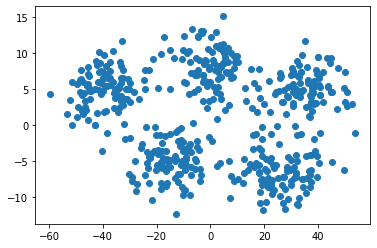

In [42]:
df = pd.read_csv('2D data.csv')
X1 = df.values
plt.scatter(X1[:, 0], X1[:, 1]);

### Visualize the Data

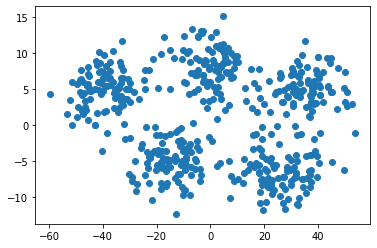

In [73]:
plt.scatter(X1[:, 0], X1[:, 1]);

(-60.0, 60.0)

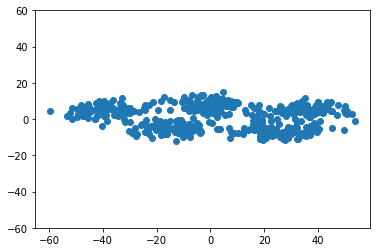

In [75]:
plt.scatter(X1[:, 0], X1[:, 1]);
plt.ylim(-60, 60)

## Sklearn Clustering

The Sklearn library proides a number of off the shelf clustering algorithms. Below are examples of 3 different ways to cluster data poins: 
1. Kmeans Clustering
2. Spectral clustering
3. Agglomerative or Hierarchical Clustering

We will first explore these 3 algorithms on the data set visualized above. Then we will move to another data set, which contains 15 dimensional data. There the goal will be to explore the Sklearn library and use it to practice clustering the data set using different algorithms. More information on the different clustering algorithms provided in the library can be found at:
https://scikit-learn.org/stable/modules/clustering.html#k-means

### Kmeans Clustering

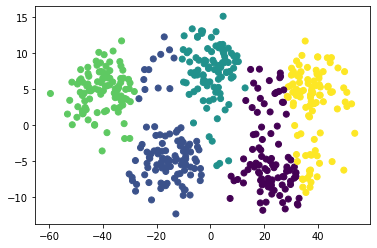

In [81]:
kmeans = sklearn.cluster.KMeans(n_clusters=5)
kmeans.fit(X1)
y_predictions = kmeans.predict(X1)
plt.scatter(X1[:, 0], X1[:, 1], c=y_predictions)

### Spectral Clustering

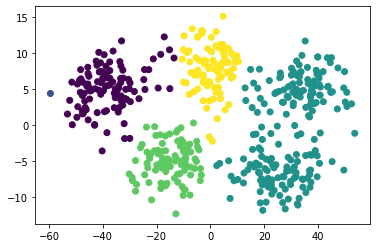

In [38]:
spectral = sklearn.cluster.SpectralClustering(n_clusters = 5)
spectral.fit(X1)
y_predictions = spectral.fit_predict(X1)
plt.scatter(X1[:, 0], X1[:, 1], c=y_predictions)

### Agglomerative Clustering

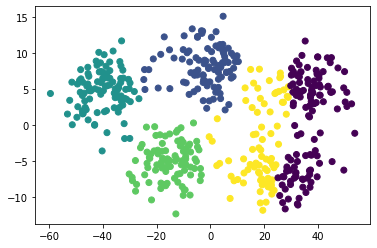

In [39]:
agglomerative = sklearn.cluster.AgglomerativeClustering(n_clusters = 5)
agglomerative.fit(X1)
y_predictions = agglomerative.labels_
plt.scatter(X1[:, 0], X1[:, 1], c=y_predictions)

# Exercise

Now that we have used 3 different clustering algorithms on this data set, we will continue by loading in data set 2, which contains 15 dimensional data. Once it is loaded and we analize the number of clusters, we should revisit the link above and explore the other clustering options provided in Sklearn.

https://scikit-learn.org/stable/modules/clustering.html

## Load Data Set 2

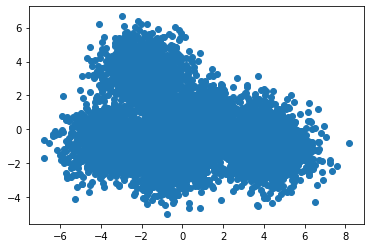

In [43]:
df = pd.read_csv('15D data.csv')
X2 = df.values

## Visualize the Data

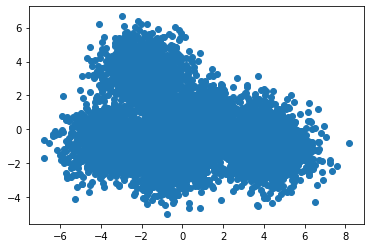

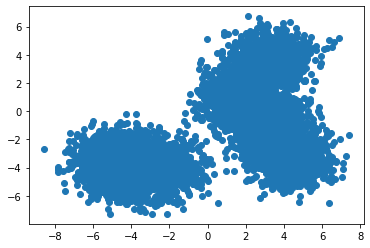

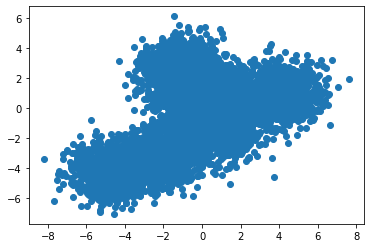

In [47]:
plt.figure(0)
plt.scatter(X2[:, 0], X2[:, 1]);
plt.figure(1)
plt.scatter(X2[:, 2], X2[:, 3]);
plt.figure(2)
plt.scatter(X2[:, 4], X2[:, 5]);

## Analyze the Number of Clusters

In data set 1, we were able to see the number of clusters in the data se by visually inspecting it. However, since we can't visualize 15 dimensional data, we must find another method for determining the correct number of clusters. One such method is to define a metric that is a measure of how good the clusters we form are. Using a metric like this, we can apply a clustering algorithm to the data set and measure which number of clusters is optimal. With the Davis-Bouldin metric, the optimal number of clusters has the lowest Davis-Bouldin score.

In the code below, we will do this with the Davis-Bouldin Clustering Metric, but Sklearn provides a number of other metrics which can similarly be used. More information can be found here: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.davies_bouldin_score.html

In [71]:
number_of_clusters = np.zeros(16)
davies_bouldin_score = np.zeros(16)
for i in range(2,len(number_of_clusters),1):
    number_of_clusters[i] = i
    kmeans = sklearn.cluster.KMeans(n_clusters=i)
    kmeans.fit(X2)
    labels = kmeans.labels_
    davies_bouldin_score[i] = sklearn.metrics.davies_bouldin_score(X2, labels)
    
plt.plot(number_of_clusters, davies_bouldin_score)
plt.xlim(2,16)


Text(0.5, 1.0, 'Optimal Number of Clusters')

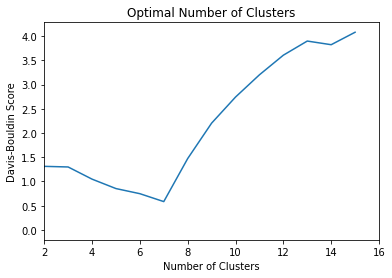

In [80]:
plt.plot(number_of_clusters, davies_bouldin_score)
plt.xlim(2,16)
plt.xlabel("Number of Clusters")
plt.ylabel("Davis-Bouldin Score")
plt.title("Optimal Number of Clusters")

Using the optimal number of clusters we found able and any clustering algorithm provided in Sklearn, now try clustering data set 2.